C:\Users\swara\AppData\Local\Temp\ipykernel_8056\2440073954.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed



Value at Risk (VaR) for the Portfolio:
  Confidence Level         VaR
0           90.00%  ₹10,934.92
1           95.00%  ₹14,767.70
2           99.00%  ₹25,347.56


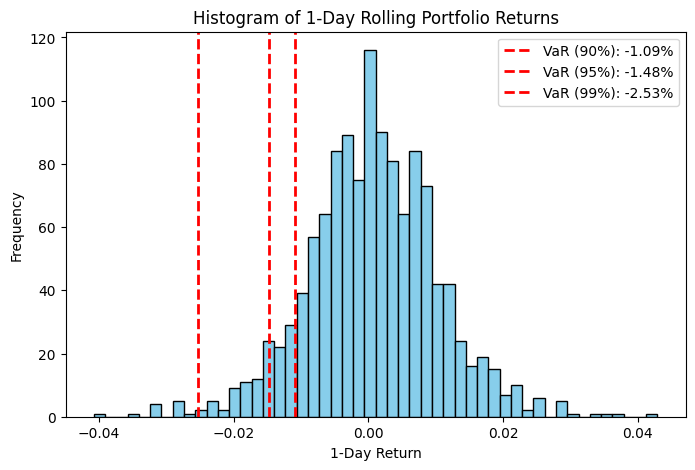

In [2]:
# ==========================
# Historical VaR Method
# ==========================

import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

# ------------------- CONFIGURATION -------------------
YEARS = 5
TICKERS = ['INFY.NS', 'CIPLA.NS', 'ITC.NS']
PORTFOLIO_VALUE = 1_000_000
CONFIDENCE_LEVELS = [0.90, 0.95, 0.99]
DAYS = 1
PLOT_RESULTS = True
# ------------------------------------------------------

def fetch_price_data(tickers, years):
    """Fetch adjusted closing prices for given tickers over the past `years`."""
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=365 * years)
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    return pd.DataFrame(prices).dropna()

def calculate_portfolio_returns(prices, weights):
    """Calculate daily portfolio returns given price data and weights."""
    returns = prices.pct_change().dropna()
    return returns.dot(weights)

def calculate_var(portfolio_returns, confidence_levels, portfolio_value, days=1):
    """Calculate Value at Risk (VaR) for given confidence levels."""
    range_returns = portfolio_returns.rolling(window=days).sum().dropna()
    var_values = [
        round(-np.percentile(range_returns, (1 - cl) * 100) * portfolio_value, 2)
        for cl in confidence_levels
    ]
    return var_values, range_returns

def plot_var_distribution(range_returns, confidence_levels, days):
    """Plot return distribution with VaR cutoffs."""
    plt.figure(figsize=(8, 5))
    plt.hist(range_returns, bins=50, color='skyblue', edgecolor='black')

    for cl in confidence_levels:
        cutoff = np.percentile(range_returns, (1 - cl) * 100)
        plt.axvline(cutoff, color='red', linestyle='dashed', linewidth=2,
                    label=f'VaR ({int(cl * 100)}%): {cutoff:.2%}')

    plt.title(f'Histogram of {days}-Day Rolling Portfolio Returns')
    plt.xlabel(f'{days}-Day Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# ------------------- MAIN SCRIPT -------------------
if __name__ == "__main__":
    # 1. Fetch prices
    prices = fetch_price_data(TICKERS, YEARS)

    # 2. Equal-weight portfolio
    weights = np.array([1 / len(TICKERS)] * len(TICKERS))

    # 3. Calculate portfolio returns
    portfolio_returns = calculate_portfolio_returns(prices, weights)

    # 4. Calculate VaR
    var_values, range_returns = calculate_var(portfolio_returns, CONFIDENCE_LEVELS, PORTFOLIO_VALUE, DAYS)

    # 5. Display results
    var_df = pd.DataFrame({
    'Confidence Level': CONFIDENCE_LEVELS,
    'VaR': var_values
    })

    # Format only the VaR column
    var_df['VaR'] = var_df['VaR'].apply(lambda x: f'₹{x:,.2f}')
    var_df['Confidence Level'] = var_df['Confidence Level'].apply(lambda x: f'{x*100:,.2f}%')

    print("\nValue at Risk (VaR) for the Portfolio:")
    print(var_df)


    # 6. Plot if enabled
    if PLOT_RESULTS:
        plot_var_distribution(range_returns, CONFIDENCE_LEVELS, DAYS)
